# Criando uma Rede Neural para o dataset Cifar10

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D
from keras.utils import np_utils
from keras import datasets
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np


In [11]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


## Plotando uma exemplo

Text(0.5, 1.0, 'Classe:[9]')

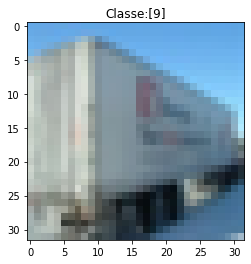

In [13]:
plt.imshow(x_train[15], cmap="gray")
plt.title(f"Classe:{y_train[15]}")

# Pré-Processamento da base de dados

### Normalizando a escala dos valores


In [14]:
prev_train = x_train / 255
prev_test = x_test / 255

print(prev_test)

[[[[0.61960784 0.43921569 0.19215686]
   [0.62352941 0.43529412 0.18431373]
   [0.64705882 0.45490196 0.2       ]
   ...
   [0.5372549  0.37254902 0.14117647]
   [0.49411765 0.35686275 0.14117647]
   [0.45490196 0.33333333 0.12941176]]

  [[0.59607843 0.43921569 0.2       ]
   [0.59215686 0.43137255 0.15686275]
   [0.62352941 0.44705882 0.17647059]
   ...
   [0.53333333 0.37254902 0.12156863]
   [0.49019608 0.35686275 0.1254902 ]
   [0.46666667 0.34509804 0.13333333]]

  [[0.59215686 0.43137255 0.18431373]
   [0.59215686 0.42745098 0.12941176]
   [0.61960784 0.43529412 0.14117647]
   ...
   [0.54509804 0.38431373 0.13333333]
   [0.50980392 0.37254902 0.13333333]
   [0.47058824 0.34901961 0.12941176]]

  ...

  [[0.26666667 0.48627451 0.69411765]
   [0.16470588 0.39215686 0.58039216]
   [0.12156863 0.34509804 0.5372549 ]
   ...
   [0.14901961 0.38039216 0.57254902]
   [0.05098039 0.25098039 0.42352941]
   [0.15686275 0.33333333 0.49803922]]

  [[0.23921569 0.45490196 0.65882353]
   [0.1

### Transformando as classes em valores tipo dummy

In [15]:
class_train = np_utils.to_categorical(y_train, 10)
class_test = np_utils.to_categorical(y_test, 10)

In [16]:
print(class_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


# Criando a estrutura de Rede Neural

In [22]:
# Instanciando a estrutura de rede neural
classificador = Sequential()
classificador.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3),padding="same", activation="relu"))
classificador.add(Dropout(0.2))
classificador.add(BatchNormalization())
classificador.add(MaxPool2D(pool_size=(2, 2),strides=2, padding="valid"))

classificador.add(Conv2D(64, (3, 3),padding="same", activation="relu"))
classificador.add(Dropout(0.2))
classificador.add(BatchNormalization())
classificador.add(MaxPool2D(pool_size=(2, 2),strides=2, padding="valid"))

classificador.add(Conv2D(128, (3, 3),padding="same", activation="relu"))
classificador.add(Dropout(0.2))
classificador.add(BatchNormalization())
classificador.add(MaxPool2D(pool_size=(2, 2),strides=2, padding="valid"))

# Adicionando a camada de flatten necessária para conectar a rede neural convolucional as camadas densas de uma
# rede neural densa
classificador.add(Flatten())

# Adicionando as camadas densas da rede
classificador.add(Dense(units=128, activation="relu"))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=128, activation="relu"))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=10, activation="softmax"))

# compilando o modelo
classificador.compile(loss="categorical_crossentropy",
                      optimizer="adam",
                      metrics=["accuracy"])


classificador.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_14 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 16, 16, 64)       

In [23]:
# Treinando o modelo
classificador.fit(prev_train,
                  class_train,
                  batch_size=128,
                  epochs=15,
                  validation_data=(prev_test, class_test))

Epoch 1/15
391/391 [==============================] - 9s 21ms/step - loss: 1.8343 - accuracy: 0.3469 - val_loss: 2.1496 - val_accuracy: 0.2932
Epoch 2/15
391/391 [==============================] - 8s 20ms/step - loss: 1.1973 - accuracy: 0.5742 - val_loss: 1.0962 - val_accuracy: 0.6131
Epoch 3/15
391/391 [==============================] - 8s 20ms/step - loss: 0.9814 - accuracy: 0.6579 - val_loss: 1.5264 - val_accuracy: 0.5176
Epoch 4/15
391/391 [==============================] - 8s 20ms/step - loss: 0.8656 - accuracy: 0.6988 - val_loss: 1.0098 - val_accuracy: 0.6533
Epoch 5/15
391/391 [==============================] - 8s 20ms/step - loss: 0.7781 - accuracy: 0.7329 - val_loss: 1.5175 - val_accuracy: 0.5231
Epoch 6/15
391/391 [==============================] - 8s 20ms/step - loss: 0.7113 - accuracy: 0.7528 - val_loss: 0.7825 - val_accuracy: 0.7291
Epoch 7/15
391/391 [==============================] - 8s 20ms/step - loss: 0.6520 - accuracy: 0.7743 - val_loss: 0.8102 - val_accuracy: 0.7221